### 混合正規分布モデルの理論


前回学んだ、k平均法の1つの問題は、クラスタリングの結果をどの程度信じて良いのか...よくわからない点です。  
  
例えば$x^{(n)}$が第$l$クラスタに属するという結果が出たとしても、それがほぼ確実なのか、それとも実が別のクラスターに帰属させても大差ないのか  
についての情報がありません。この点により豊かな情報を与えるために、k平均法を統計的機械学習の観点から定式化してみます。  
  
クラスターの数を$K$として、$k$番目のクラスターが、平均${\mu_{k}}$, 共分散行列$\sum_{k}$の正規分布$N(x|\mu_{k}, \sum_{k})$で表せるものとします。これは「クラスター番号$k$が決まれば、確定する$x$の分布」ですから、条件付き確率の記号を使うと$p(x|z=k)$ということになります。  
  
ここでの$z$はクラスターの帰属先を示す**確率変数**で、値としては$1$から$K$までの番号のどれかです。  
これを、zに応じて決まる確率値そのものをパラメータとして$p(z)=\pi_{z}$とします。言い換えれば、データからランダムに1つの標本を取り出したときに、それが$k$番目のクラスタに属する確率が$\pi_{k}$となります。ここですべての$\pi_{k}$を足し合わせれば、つまり$\pi_{1}+\pi_{2}+...+\pi_{K}$は$1$となります。  
  
$$
\pi_{1}+\pi_{2}+...+\pi_{K} = 1
$$

改めてまとめると、出発点として想定する確率モデルは次の通りです。  
  
$$
p(x|z) = N(x|\mu_{z}, \Sigma_{z}), p(z)=\pi_{z}
$$
  
条件付きの確率の定義から、zを周辺化により消去して、$x$のみの分布を作るとつぎのようになります。
  
$$
p(x|\Theta)=\sum_{k=1}^{K}\pi_{k}N(x|\mu_{k}, \Sigma_{k})
$$
  
ただし、$K$個のクラスターをもつパラメータをまとめて$\Theta$(シータ)
  
$$
\Theta = {\pi_{1}, \pi_{2}, ... ,\pi_{K}, \mu_{1}, \mu_{2}, ... , \mu_{K}, \Sigma_{1}, \Sigma_{2}, ... , \Sigma_{K}}
$$
と表しました。これは混合正規分布の式、  
正常標本データと異常標本データが混ざり合ったデータと仮定したとき、山を表現するのに正規分布を利用するとすると、  
  
$$
p(x) = \pi_{0}N(x|\mu_{0}, \sigma_{0}^{2}) + \pi_{1}N(x|\mu_{1}, \sigma_{1}^{2})
$$

を、M次元・K次元クラスターに拡張したモデルに他なりません。  
  
いま、M次元の標本N個からなるデータ$D={x^{(1)}, x^{(2)}, ... , x^{(N)}}$が与えられたとして、K個のクラスターに標本を分ける方法を考えます。  
これは各標本について、もっとも当てはまりの良いクラスターを選ぶ問題ですが、確率的に表現するとすれば、  
  
**「ある標本$x^{n}$が与えられたときに、最大の確率を与える$z$を選ぶ」**  
  
という問題となります。すなわちクラスタリングの問題とは、最大値を求める問題となります。この$z$についての確率分布は、ベイズの理論から  
  
$$
p(z|x, \Theta) = \frac{p(x|z)p(z)}{\sum_{z^{'}=1}^{K}p(x|z^{'})p(z^{'})} = \frac{N(x|\mu_{z}, \sigma_{z})\pi_{z}}{\sum_{z^{'}=1}^{K}N(x|\mu_{z^{'}}, \sigma_{z^{'}})\pi_{z^{'}}}
$$
  
のように安易に求めることができます。この式の分母は$z$に依存しないので、混合正規分布によるクラスタリングの手順は下記のようになります。  
  
**手順(混合正規分布モデルによるクラスタリング)**  
1. データ$D$から混合正規分布のパラメータ$\Theta$を求める  
2. 各標本$x^{(n)} (n=1,2,...,N)$に対して、以下を行う。  
    a. $z=1, ... , K$について、$\pi_{z}N(x^{n}|\mu_{z}, \Sigma_{z})$を計算する。  
    b. その中で最大値を与える$z$を$x^{(n)}$の所属クラスターとする。

  
手順をよく見ると、与える標本が$D$に含まれている必要は必ずしもないのがわかります。  
つまりこれが意味することは、任意の観測点$x^{'}$が来たとしたら、上と同様に、$K$個の中から最も当てはまりの良いクラスターを選ぶことができるということです。  
これは機械学習の分野では、**クラスタリング**問題と呼ばれます。このような確率モデルを考えることによって、得られる情報の幅が一気に拡がります。  
これが統計学的機械学習の威力です。  
  
ここまでで、クラスタリング問題が、混合正規分布のパラメータ$\Theta$をデータから推定する問題に帰着できることがわかりました。  
単一の正規分布のときと同様、これは最尤推定で行うのが基本的な戦術となります。  
ただし、混合正規分布の対数尤度は、単一の正規分のときとは異なり、$K$個の項があるために若干複雑な形となります。式は以下のようになります。  
  
$$
L(\Theta|D)=In\prod_{i=1}^{N}p(x^{(n)}|\Theta)=\sum_{n=1}^{N}In\sum_{k=1}^{K}\pi_{K}N(x^{(n)}|\mu_{k}, \sigma_{k})
$$
  
理屈上では、この対数尤度を最大化するパラメータの値を求めれば良いのですが、対数$(In)$の中に総和$(\sum)$が入っているために、  
各パラメータによる微分をゼロと置いても、**簡単な式にならない**ので、解析的に最適解を求めることができません。  
  
この困難さは、「標本が$K$個のクラスターのどれから出てきたか、わからない」という点に由来します。  
そこで出身クラスターを表す確率変数$z$の値が、各標本$x^{(n)}$に対して、基地であるかのようにみなして、  
次の量を最大化するパラメータを求める問題に読み替えます。  
  
$$
L(\Theta|D, Z) = \sum_{n=1}^{N}\sum_{k=1}^{K}\delta(z^{(n)}, k)In \left \{ \pi_{k}N(x^{(n)} | \mu_{k}, \Sigma_{k}) \right \}
$$
  
ただし、$z^{(n)}$は、標本の出身クラスターを表す確率変数です。また、左辺の$Z$は、$\{z^{(1)}, ... , z^{(N)}\}$をまとめて表したものです。  
$L(\Theta|D,Z)$, $L(\Theta|D)$は同じものではありませんが、この読み替えがある意味で最善の近似となっていることが大前提となっています。(詳細は別途アップデートします)  
  
$L(\Theta|D,Z)$を最大化してパラメータ$\Theta$を求めるためには、$z^{(n)}$に関係する部分で既知でなければなりません。  
しかしこれは観測されない仮想的な値ですので、**期待値-最大化法**を使います。  
すなわち、上式の$\delta(z^{(n)}, k)$の部分を「ある種の期待値」として推定しておき、その値($q_{k}^{(n)}$とおきます)を既知の数値として、$L(\Theta|D, Z)$を最大化することで、パラメータ$\Theta$を求めることをします。  
  
直感的には、$q_{k}^{n}$は「標本$x^{n}$が第$k$クラスター出身である度合い」を意味するので  
  
$$
q_{k}^{(n)} \propto \pi_{k}N(x^{(n)}|\mu_{k}, \Sigma_{k})
$$

となります。つまり、この式が意味することは、現時点で手元にある$\{ \pi_{k}, \mu_{k}, \Sigma_{k}(k=1,2, ... , K) \}$を用いて$q_{k}^{(n)}$を計算して、計算された$q_{k}^{(n)}$を用いて$\{ \pi_{k}, \mu_{k}, \Sigma_{k} \}$を再計算して、、... という手順を繰り返します。  
  
これを使うことで、混合正規分布モデルのパラメータを多次元の観測値のデータから推定できる手順が、1次元のときの手順の自然な拡張として、次のように求められます。  

**手順(混合正規分布の期待値-最大化法)**  
1) 初期化: 混合正規分布のパラメータ  
$$
\hat \Theta = \{ \hat \pi_{1}, ... , \hat \pi_{K}, \hat \mu_{1}, ... , \hat \mu_{K}, \hat \Sigma_{1}, ... , \hat \Sigma_{K} \}
$$
    に適当な初期値を与える  
2) 反復: 収束するまで、以下を繰り返す
    a) 期待値ステップ: 現在のパラメータ推定値$\hat \Theta$を用いて、  
    各標本の各要素(クラスター)への帰属度$q_{k}^{(n)}$を次式で求める。  
    $$
    q_{k}{(n)} = \frac{\hat \pi_{k}N(x^{(n)}|\hat \mu_{k}, \hat \sigma_{k})}{\sum_{k=1}^{K}\hat \pi_{l}N(x^{(n)}|\hat \mu_{l}, \hat \sigma_{l})}
    $$
    b) 最大化ステップ: 現在の帰属度$q_{k}^{(n)}$をもとにして、  
    パラメータ${\pi_{k}, \mu_{k}}(k=1,2,...,K)$のついての推定値を次式で決める  
    $$
    \hat \pi_{k} = \frac{1}{N}\sum_{n=1}^{N}q_{k}^{(n)}, \hat \mu_{k} = \frac{\sum_{n=1}^{N}q_{k}^{(n)}x^{(n)}}{\sum_{n=1}^{N}q_{k}^{(n)}}
    $$
    さらに、パラメータ$\{ \sigma_{k} \}(k=1,2,...,K)$の推定値を次式で求める。  
    $$
    \hat \Sigma_{k} = \frac{1}{\sum_{n=1}^{N}q_{k}^{(n)}}\sum_{n=1}^{N}q_{k}^{(n)}(x^{(n)}-\hat \mu_{k})(x^{(n)}-\hat \mu_{k})^{T}
    $$
    これらを新しいパラメータ推定値$\hat \Theta$とする。

以上で、直感的にこれら導出をしていますが、理論的には、イエンセンの不等式を用いて正確な導出をする必要があります。(詳細は割愛)

### 混合正規分布を試す
上記の理論に基づいて、実際にはScikit Learnライブラリの中に実装されています。ので、自らコーディングする必要はありません。

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture

In [11]:
# 観測データを取得
df = pd.read_csv("./DATA/Davis.csv")
weight = df["weight"]
height = df["height"]

Davisデータの中で、12番目のデータ{height: 57, Wight:166}という異様なデータがあることは既に確認しています。  
ので、このデータだけは除去します。  

In [12]:
X = pd.concat([weight, height], axis=1) # 標本数 * 次元数(2)のデータ行列
X_train = X.drop(11)  # 11番目のデータを除去
X = np.array(X)
X_train = np.array(X_train)

In [13]:
# 混合正規分布(ガウス混合分布)モデルによるクラスタリング
clf = GaussianMixture(n_components=2) # 混合成分の数
clf.fit(X_train)
X_pred = clf.predict(X_train)

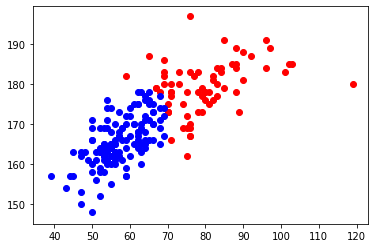

In [14]:
# クラスタリングの結果をプロット
cluster0 = X_train[X_pred == 0]
cluster1 = X_train[X_pred == 1]
plt.scatter(cluster0[:,0], cluster0[:,1], color="red")
plt.scatter(cluster1[:,0], cluster1[:,1], color="blue")
plt.show()

混合正規分布モデルではなく$k$平均法を使って異常検知をするとしたら、最初に$x^{'}$が属する「山」を1つ選び、  
それを表す**単一の正規分布**についてマハラノビス距離に基づき、異常検知を行うという手順になります。  
  
クラスター同士の重なりが少なく、クラスター数が事前にわかっていればおそらくそれでも構いません。  
しかしながら、一般にはクラスター同士が重なっていない保証はなく、クラスター数も事前にはわかりません。。。  
  
**混合正規分布モデルを使えば、クラスター同士の重なりを表現することができ、  
さらに、ベイズ情報量基準などによって、最適なクラスター数の目安をつけられるという実用上の大きな利点があります。**

In [15]:
# 混合比を取り出す
pi = clf.weights_

In [16]:
pi

array([0.38347843, 0.61652157])

In [17]:
# 異常度を計算
anomaly_scores = -clf.score_samples(X)

In [18]:
anomaly_scores

array([  7.25105974,   6.37191715,   6.13684427,   6.711525  ,
         7.84874018,   7.80947538,   8.5799518 ,   8.70271375,
         6.86835904,   6.17102645,   6.67127995, 334.04793836,
         6.30582617,   6.18957414,   6.16708658,   6.67700623,
         8.10355275,   5.94060996,  12.2797777 ,   6.6790682 ,
        14.55605236,   5.91524256,   6.43816629,   6.29559353,
         6.98737125,   6.9217547 ,   6.00201599,   5.79166219,
         9.67632837,   9.05196439,   8.17222888,   6.96701269,
         7.47929164,   6.21082312,   6.80833019,   6.63075714,
         5.8528438 ,   6.5781908 ,   7.59828713,   9.74674361,
         5.95806796,   7.09052235,   6.8886965 ,   7.3574649 ,
         7.29408363,   6.24209508,   7.07743639,   6.62571   ,
         7.90455132,  10.27739167,   7.23567644,   5.83352249,
         7.83701337,   9.16178218,   6.83534186,   6.5887839 ,
         6.33511954,   7.53538049,   7.35714419,   6.82542257,
         7.72863997,   6.79780676,   7.09947512,   7.41

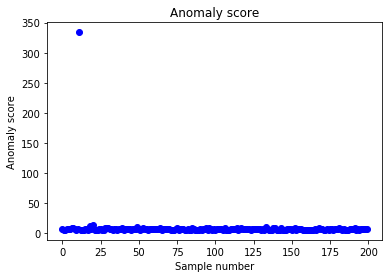

In [19]:
# プロット
plt.title("Anomaly score")
plt.xlabel("Sample number")
plt.ylabel("Anomaly score")
plt.plot(range(len(anomaly_scores)), anomaly_scores, "bo")
plt.show()

12番目のデータを入れて、再度このモデルを利用すると、明らかに異常なデータであったことがわかります。  
  
**混合正規分布の注意点**  
混合正規分布を異常検知に用いるときの課題を指摘しておきます。  
各クラスターの平均と共分散行列の式からわかる通り、もしあるクラスタに属する標本の数が1つしかない場合、共分散行列がゼロ行列となり、  
その後の反復計算が不可能となってしまう点です。したがって、**混合正規分布を使って正常モデルを学習させる場合には、仲間から外れた異常標本が  
１つも含まれないように事前に慎重にデータクレンジングを行う**必要があります。

### サポートベクタマシン

**結論から先にいうと。。。**  
サポートベクタマシンによる異常検知は、そのサポートベクタマシン自身の柔軟な表現能力によって諸刃の剣となります。  
特に高次元データではどのような識別曲線が出るかが直感的に予想しがたいため、どのようなカーネルを選んで良いかを決めるには、一般的に  
簡単ではありません。また訓練データに対して異常標本とするものの割合をどう決めれば良いかも必ずしも明確ではありません。  
  
実用上では、正常状態について、少ない標本を使ってコンパクトな表現を得られるというメリットを活かして、  
サポートベクタ(支持ベクトル)に対応する標本を記録しつつ、その具体的な内容を調べながら異常判定モデルを吟味すると良いです。  
つまり、事例の詳細についての知識がないときは、サポートベクタマシンを安直に利用するのではなく、  
より解釈可能性が高いモデルを使う方が安全です。

これまでの近傍距離に基づく手法は、着目点の周りの局所的なデータの散らばりに着目して異常を定義するものでした。  
ここではある意味、発想を単一正規分布で考えたような世界に戻して、データ$D={x^{(1)}, ... , x^{(N)}}$が与えられたときに、  
データの全体を囲む「球」を考えます。ここからは[資料](https://www.slideshare.net/KazuhiroSato8/casual-learning-machine-learning-withexcelno4)でみていきます。

In [1]:
# -*- coding: utf-8 -*-

import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import svm
from scipy import stats

In [2]:
# サンプルデータを作成
X1 = np.random.normal(0.0, 1.0, (60,2)) # 平均0.0、分散1.0の正規分布に乱数を60*2行列で作成
X2 = np.random.normal(3.0, 1.0, (60,2)) # 平均3.0、分散1.0の正規分布に乱数を60*2行列で作成
X = np.vstack([X1, X2]) # X1とX2を連結

In [3]:
# 標準化（平均0、分散1となるように変換）
X_train = preprocessing.scale(X)

In [4]:
# SVM
clf = svm.OneClassSVM(nu=0.5, kernel="rbf", gamma=0.5)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)

In [5]:
# 閾値を設定
th = stats.scoreatpercentile(y_pred_train, 100 * 0.05) # パーセンタイルで異常判定の閾値設定

In [6]:
# ２次元作図用格子状データの生成
xx, yy = np.meshgrid(np.linspace(-4, 4, 500), np.linspace(-4, 4, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) # 格子状に超平面との距離を出力
Z = Z.reshape(xx.shape)

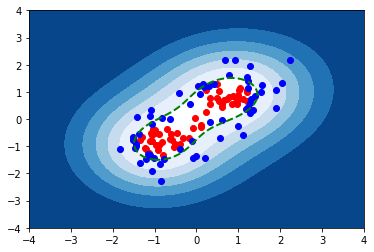

In [7]:
# プロット
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), th, 7), cmap=plt.cm.Blues_r)
plt.contour(xx, yy, Z, levels=[th], linewidths=2, colors='green')
plt.scatter(X_train[y_pred_train==1][:,0], X_train[y_pred_train==1][:,1], color="red")
plt.scatter(X_train[y_pred_train==-1][:,0], X_train[y_pred_train==-1][:,1], color="blue")
plt.show()